# Hierarchical Clustering 
Hierarchical Clustering is an unsupervised machine learning method that builds a hierarchy of clusters rather than a single flat partition like K-means.

# 🔹 Two Main Types
Agglomerative (Bottom-Up) —

Start with each point as its own cluster.

Merge the two closest clusters step by step until all points are in one cluster.

Most common type.

Divisive (Top-Down) —

Start with all points in one cluster.

Split clusters recursively until each point stands alone.

# 🔹 How It Works (Agglomerative Example)
Compute the distance matrix between all points.

Find the two closest clusters and merge them.

Update the distance matrix based on the chosen linkage method:

Single linkage → nearest neighbor distance.

Complete linkage → farthest neighbor distance.

Average linkage → average distance between all points in both clusters.

Ward’s method → minimizes variance within clusters.

Repeat until all points are in a single cluster.

#  Output: Dendrogram
A tree-like diagram showing the order and distances at which clusters were merged or split.

You can “cut” the dendrogram at a certain height to choose the desired number of clusters.

# 🔹 Advantages
No need to pre-specify the number of clusters.

Produces a full clustering hierarchy.

Works with different distance measures (Euclidean, Manhattan, correlation, etc.).

# 🔹 Limitations
Computationally expensive for large datasets (O(n²) time).

Sensitive to outliers and noise.

In [ ]:
# Hierarchical Clustering in Python (USArrests)
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt



In [18]:

# Load dataset
# USArrests dataset from R is available in seaborn's vega_datasets or we can load manually
url = "https://vincentarelbundock.github.io/Rdatasets/csv/datasets/USArrests.csv"
df = pd.read_csv(url)



In [19]:
df

,rownames,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [21]:
# Move state names to index
df = df.set_index(df.columns[0])





In [22]:
# Standardize data
X = StandardScaler().fit_transform(df)

In [23]:
# --------------------
# Compute distance matrix & hierarchical clustering
# --------------------
linkage_matrix = linkage(X, method='complete', metric='euclidean')


Text(0, 0.5, 'Euclidean distance')

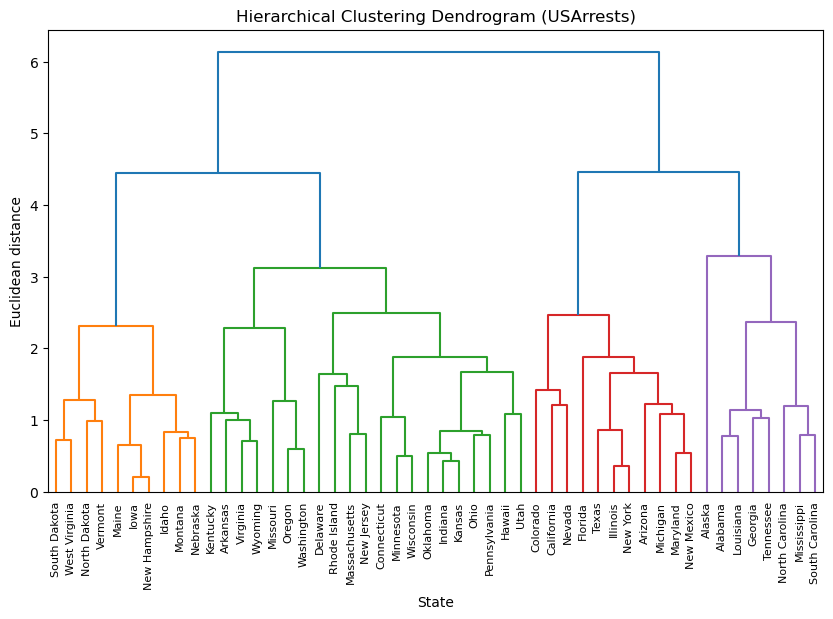

In [25]:
# --------------------
# Plot dendrogram
# --------------------
plt.figure(figsize=(10, 6))
dendrogram(
    linkage_matrix,
    labels=df.index.tolist(),
    leaf_rotation=90,
    leaf_font_size=8,
    color_threshold=0.7 * max(linkage_matrix[:, 2])  # Cut height for colors
)
plt.title("Hierarchical Clustering Dendrogram (USArrests)")
plt.xlabel("State")
plt.ylabel("Euclidean distance")


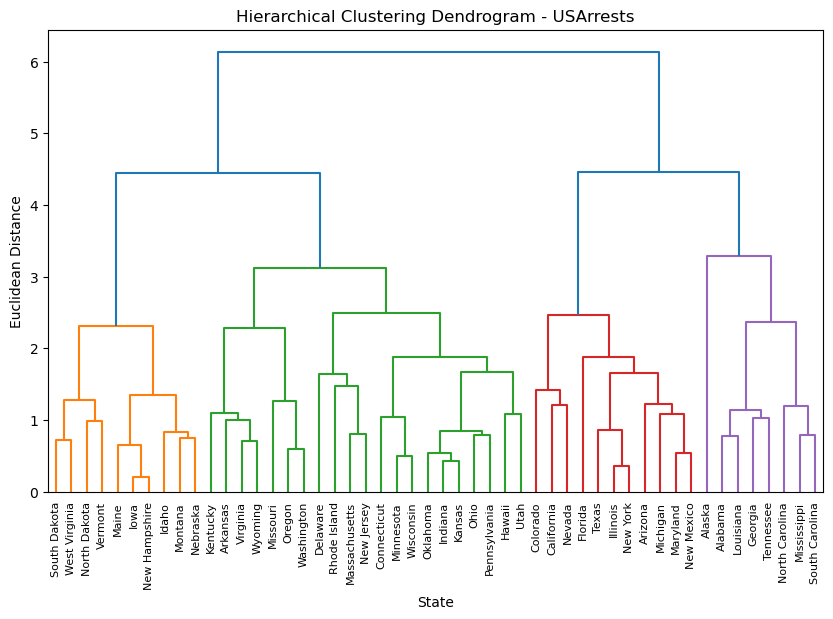

In [27]:
#Perform hierarchical clustering
linked = linkage(X, method='complete',metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, labels=df.index, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram - USArrests')
plt.xlabel('State')
plt.ylabel('Euclidean Distance')
plt.show()